# Predict if the merchant is fraudster or not for an e-commerce client.

## Problem Description

* 'XYZ' is a large e-commerce company facing an increasing number of fraudster merchants in various countries.
* The fraudsters deceive customers by delivering counterfeits or nothing at all, posing challenges to legitimate merchants and the company.
* Both the company and merchants acknowledge the severity of the problem and desire a technological solution.
* The task is to develop an analytical and modeling framework using dataset features to predict whether a merchant is fraudulent or not.

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import ipaddress

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.utils import class_weight
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

2023-08-04 10:38:13.431588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-04 10:38:14.104728: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-04 10:38:14.104751: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-04 10:38:15.719821: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

## Reading the Datasets

In [2]:
# Read merchant data
train_merchant = pd.read_csv("train_merchant_data-1561627820784.csv")

# Read orders data
train_order = pd.read_csv("train_order_data-1561627847149.csv")

# Read labels data
train_labels = pd.read_csv("train-1561627878332.csv")

# Setting visibility of rows and columns to display all
pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)

In [3]:
# Checking the Shape of each Dataframe

print(f"The Shape of train_merchant is {train_merchant.shape[0]} rows and {train_merchant.shape[1]} columns. \n")
print(f"The Shape of train_order is {train_order.shape[0]} rows and {train_order.shape[1]} columns. \n")
print(f"The Shape of train_labels is {train_labels.shape[0]} rows and {train_labels.shape[1]} columns.")

The Shape of train_merchant is 54213 rows and 7 columns. 

The Shape of train_order is 54213 rows and 7 columns. 

The Shape of train_labels is 54213 rows and 2 columns.


## Merging the 3 DataFrames


In [4]:
# Merging the dataframe train_merchant and train_order

merge_train_merchant_with_order = train_merchant.merge(train_order,on=["Merchant_ID"])
merge_train_merchant_with_order.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet


In [5]:
# Merging the dataframe merge_train_merchant_with_order (train_merchant and train_order) and train_labels

merged_train = merge_train_merchant_with_order.merge(train_labels,on=["Merchant_ID"])
merged_train.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0


In [6]:
# Checking the Shape of Dataframe

print(f"The Shape of merged_train dataframe is {merged_train.shape[0]} rows and {merged_train.shape[1]} columns.")

The Shape of merged_train dataframe is 54213 rows and 14 columns.


## We have a dataset with the information of IP addresses and their corresponding countries, let's read the dataset and use it for IP address geolocation, which will provide us valuable insights.

In [7]:
# Reading the dataset

df_ip = pd.read_csv("ip_boundaries_countries-1561628631121.csv")
df_ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.0.0.0,1.0.0.255,Australia
1,1.0.1.0,1.0.1.255,China
2,1.0.2.0,1.0.3.255,China
3,1.0.4.0,1.0.7.255,Australia
4,1.0.8.0,1.0.15.255,China


In [8]:
# Checking the Shape of Dataframe

print(f"The Shape of merged_train dataframe is {df_ip.shape[0]} rows and {df_ip.shape[1]} columns.")

The Shape of merged_train dataframe is 138846 rows and 3 columns.


## Checking if there are any missing values in the dataframe

In [9]:
merged_train.isnull().sum()

Ecommerce_Provider_ID         0
Merchant_ID                   0
Merchant_Registration_Date    0
Registered_Device_ID          0
Gender                        0
Age                           0
IP_Address                    0
Customer_ID                   0
Order_ID                      0
Date_of_Order                 0
Order_Value_USD               0
Order_Source                  0
Order_Payment_Method          0
Fraudster                     0
dtype: int64

In [10]:
df_ip.isnull().sum()

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64

## Let's check the data type

In [11]:
# Checking the data type for the merged_train DataFrame
print("The datatype of each column in Merged_train DataFrame is: \n")
print(merged_train.dtypes)

# Checking the data type for the df_ip DataFrame
print("\nThe datatype of each column in df_ip DataFrame is: \n")
print(df_ip.dtypes)

The datatype of each column in Merged_train DataFrame is: 

Ecommerce_Provider_ID          int64
Merchant_ID                    int64
Merchant_Registration_Date    object
Registered_Device_ID          object
Gender                        object
Age                            int64
IP_Address                    object
Customer_ID                    int64
Order_ID                      object
Date_of_Order                 object
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Fraudster                      int64
dtype: object

The datatype of each column in df_ip DataFrame is: 

lower_bound_ip_address    object
upper_bound_ip_address    object
country                   object
dtype: object


## Observing the Cardinality in each columns

In [12]:
# Checking the unique elements in each feature

merged_train.nunique()

Ecommerce_Provider_ID             1
Merchant_ID                   54213
Merchant_Registration_Date    54213
Registered_Device_ID          51291
Gender                            2
Age                              53
IP_Address                    52028
Customer_ID                   34081
Order_ID                      54213
Date_of_Order                 54161
Order_Value_USD                 116
Order_Source                      3
Order_Payment_Method              5
Fraudster                         2
dtype: int64

In [13]:
# Checking the unique elements in each feature of country

df_ip.nunique()

lower_bound_ip_address    138846
upper_bound_ip_address    138846
country                      235
dtype: int64

## Let's Visualize and Draw Observations

### *1. Let's check the target attribute distribution.*

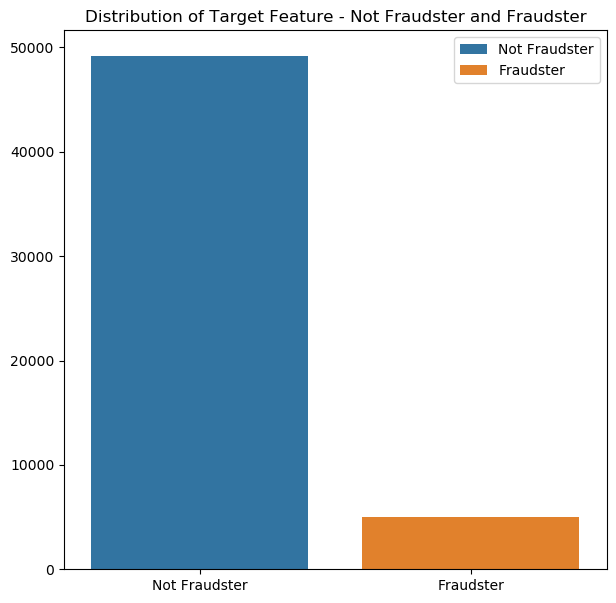

In [14]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(x=merged_train["Fraudster"], hue=merged_train["Fraudster"], dodge=False, ax=ax)

legend_labels = ['Not Fraudster', 'Fraudster']
ax.legend(legend_labels)

ax.set_title('Distribution of Target Feature - Not Fraudster and Fraudster')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(legend_labels)

plt.show()

In [15]:
merged_train['Fraudster'].value_counts(normalize=True) * 100

0    90.731005
1     9.268995
Name: Fraudster, dtype: float64

### There is clearly an imbalance in the target feature, as the ratio is approximately 91:9

### *2. Let's investigate which gender demonstrates a higher inclination towards being fraudster.*

In [16]:
gender_fraud_distribution = merged_train.groupby(['Gender', 'Fraudster'])['Fraudster'].count().unstack()
gender_fraud_distribution.columns = ['Not Fraudster', 'Fraudster']

print(gender_fraud_distribution)

        Not Fraudster  Fraudster
Gender                          
F               20417       2035
M               28771       2990


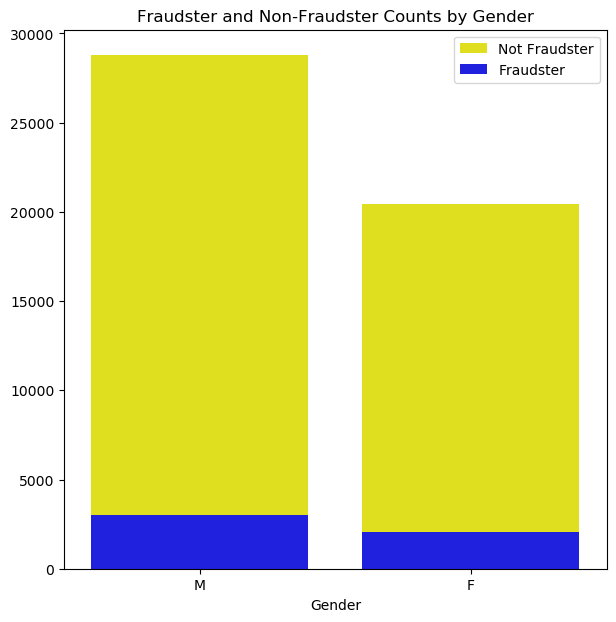

In [17]:
fig, ax = plt.subplots(figsize=(7, 7))
gender_fraud_distribution = pd.DataFrame({
    'Gender': ['M', 'F'],
    'Not Fraudster': [28771, 20417],
    'Fraudster': [2990, 2035]
})

sns.barplot(x='Gender', y='Not Fraudster', data=gender_fraud_distribution, color='yellow', label='Not Fraudster')
sns.barplot(x='Gender', y='Fraudster', data=gender_fraud_distribution, color='blue', label='Fraudster')

plt.legend()
plt.xlabel('Gender')
plt.ylabel('')
plt.title('Fraudster and Non-Fraudster Counts by Gender')
plt.show()

### The male merchants are more than female merchants and so the distribution shows slightly more fraudsters in Male *(2990 male fraudster out of 31761 male merchants)* than Female *(2035 female fraudster out of 22452 female merchants)*.

### *3. Let's see the types of channels for orders and it's relation with fraudster status.*

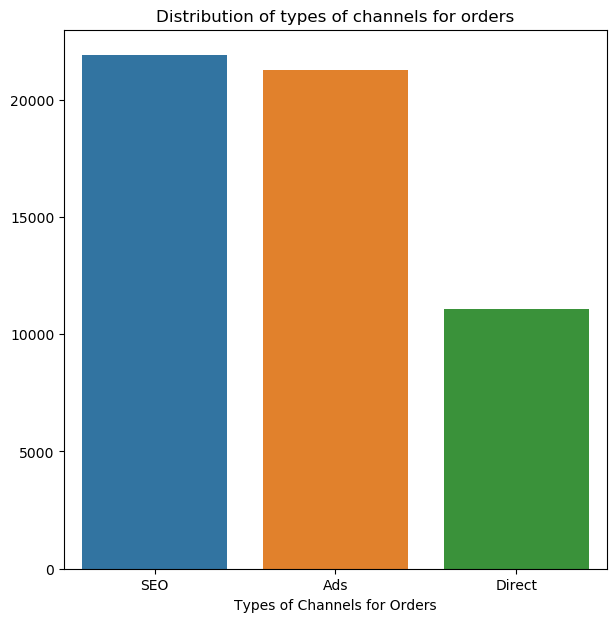

In [18]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(x='Order_Source', data=merged_train,order=merged_train['Order_Source'].value_counts().index)

ax.set_title('Distribution of types of channels for orders')
ax.set_xlabel('Types of Channels for Orders')
ax.set_ylabel('')

plt.show()

In [19]:
order_source_fraud_distribution = merged_train.groupby(['Order_Source', 'Fraudster'])['Fraudster'].count().unstack()
order_source_fraud_distribution.columns = ['Not Fraudster', 'Fraudster']

print(order_source_fraud_distribution)

              Not Fraudster  Fraudster
Order_Source                          
Ads                   19298       1961
Direct                 9899       1171
SEO                   19991       1893


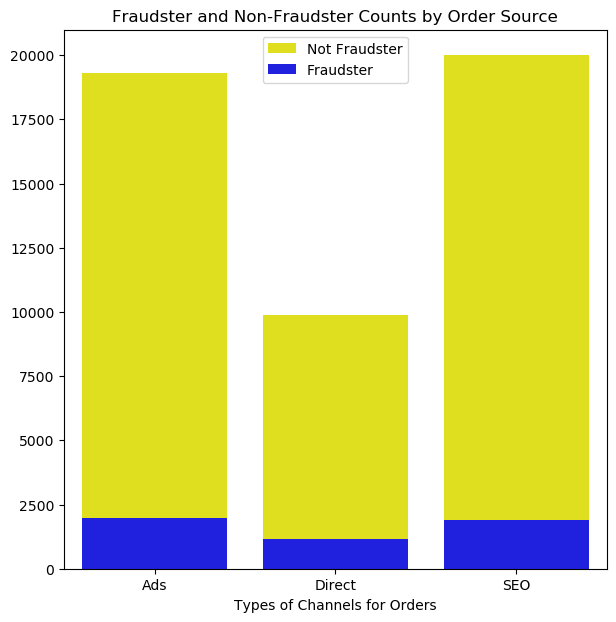

In [20]:
fig, ax = plt.subplots(figsize=(7, 7))
order_source_fraud_distribution = {
    'Order_Source': ['Ads', 'Direct', 'SEO'],
    'Not Fraudster': [19298, 9899, 19991],
    'Fraudster': [1961, 1171, 1893]
}

sns.barplot(x='Order_Source', y='Not Fraudster', data=order_source_fraud_distribution, color='yellow', label='Not Fraudster')
sns.barplot(x='Order_Source', y='Fraudster', data=order_source_fraud_distribution, color='blue', label='Fraudster')

plt.legend()
plt.xlabel('Types of Channels for Orders')
plt.ylabel('')
plt.title('Fraudster and Non-Fraudster Counts by Order Source')
plt.show()

### Customers have been drawn to the E-Commerce website for ordering from merchants primarily through targeted advertisements and effective search engine optimization (SEO) strategies, than direct visitors to the webiste for placing orders which are likely to be returning customers.

### *3. Let's check with the payment type and observe how it drives fraudsters to cheat the customers.*

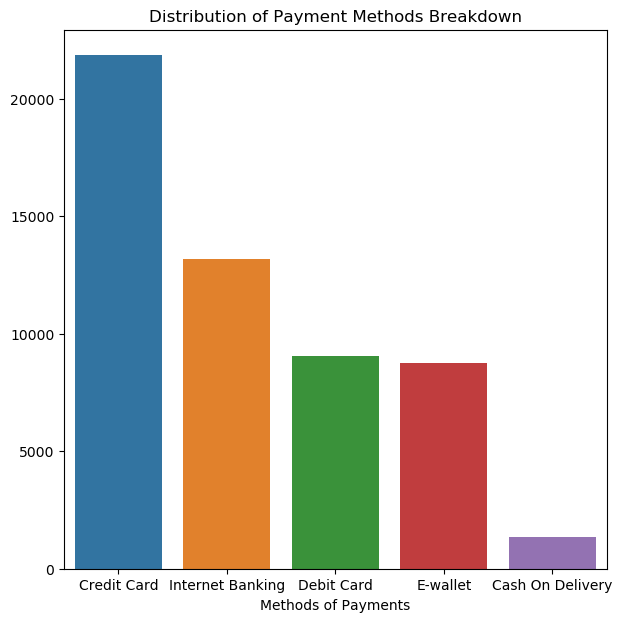

In [21]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.countplot(x='Order_Payment_Method', data=merged_train, order=merged_train['Order_Payment_Method'].value_counts().index)

ax.set_title('Distribution of Payment Methods Breakdown')
ax.set_xlabel('Methods of Payments')
ax.set_ylabel('')

plt.show()

In [22]:
payment_method_fraud_distribution = merged_train.groupby(['Order_Payment_Method', 'Fraudster'])['Fraudster'].count().unstack()
payment_method_fraud_distribution.columns = ['Not Fraudster', 'Fraudster']

print(payment_method_fraud_distribution)

                      Not Fraudster  Fraudster
Order_Payment_Method                          
Cash On Delivery               1255        112
Credit Card                   19682       2162
Debit Card                     8254        816
E-wallet                       7938        801
Internet Banking              12059       1134


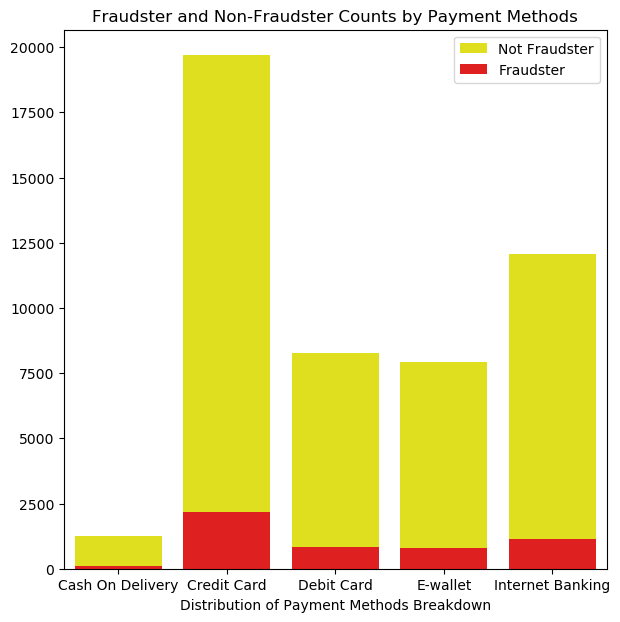

In [23]:
fig, ax = plt.subplots(figsize=(7, 7))

payment_method_fraud_distribution = {
    'Order_Payment_Method': ['Cash On Delivery', 'Credit Card', 'Debit Card', 'E-wallet', 'Internet Banking'],
    'Not Fraudster': [1255, 19682, 8254, 7938, 12059],
    'Fraudster': [112, 2162, 816, 801, 1134]
}

sns.barplot(x='Order_Payment_Method', y='Not Fraudster', data=payment_method_fraud_distribution, color='yellow', label='Not Fraudster')
sns.barplot(x='Order_Payment_Method', y='Fraudster', data=payment_method_fraud_distribution, color='red', label='Fraudster')

plt.legend()
plt.xlabel('Distribution of Payment Methods Breakdown')
plt.ylabel('')
plt.title('Fraudster and Non-Fraudster Counts by Payment Methods')
plt.show()

### Customers tend to favor online payment methods like Credit cards, Debit cards, E-Wallets, and Internet Banking, over cash on delivery. Although online payment methods carry a slightly higher risk of fraud from certain merchants trying to deceive customers, even cash on delivery is not entirely free from potential fraudulent activities, though to a lesser degree.

### *4. Let's check the age column's distribution and it's relation with target attribute.*

In [24]:
age_bins = [18, 30, 40, 50, 60, 72]

merged_train['AgeGroup'] = pd.cut(merged_train['Age'], bins=age_bins, labels=['18-29', '30-39', '40-49', '50-59', '60-72'])
age_fraud_distribution = merged_train.groupby('AgeGroup')['Fraudster'].value_counts().unstack()

print(age_fraud_distribution)

Fraudster      0     1
AgeGroup              
18-29      19429  1856
30-39      19090  2090
40-49       8210   812
50-59       1468   152
60-72         87    15


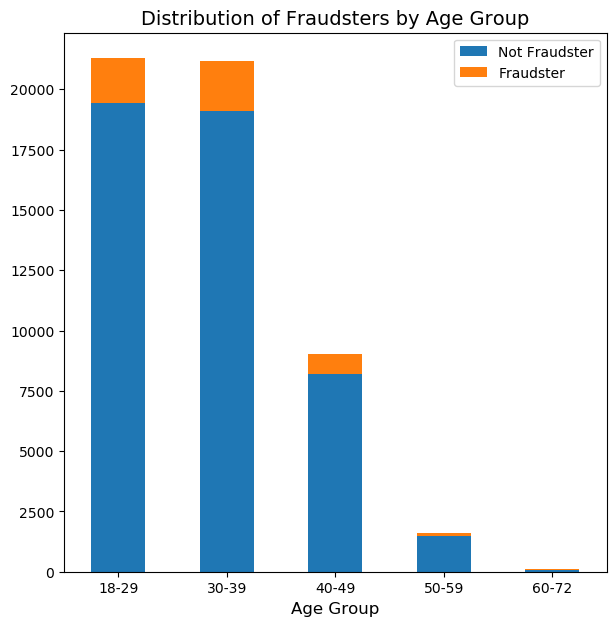

In [25]:
ax = age_fraud_distribution.plot(kind='bar', stacked=True, figsize=(7, 7))
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('', fontsize=12)
ax.set_title('Distribution of Fraudsters by Age Group', fontsize=14)
plt.legend(title='', labels=['Not Fraudster', 'Fraudster'], fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### The age groups `18 - 29` and `30 - 39` have the highest count of merchants, with a significant number of them being fraudsters. As the age increases, there is a decline in the count of merchants, and correspondingly, the number of fraudsters also decreases.

### *5. Let's analyse the spending on the order and observe the distribution.*

In [26]:
spending_bins = [22, 100, 200, 300, 385]
merged_train['SpendingGroup'] = pd.cut(merged_train['Order_Value_USD'], bins=spending_bins, labels=['22-100', '101-200', '201-300', '301-385'])

spending_fraud_distribution = merged_train.groupby('SpendingGroup')['Fraudster'].value_counts().unstack()
print(spending_fraud_distribution)

Fraudster            0       1
SpendingGroup                 
22-100         29555.0  2951.0
101-200        17988.0  1878.0
201-300          897.0   102.0
301-385            5.0     NaN


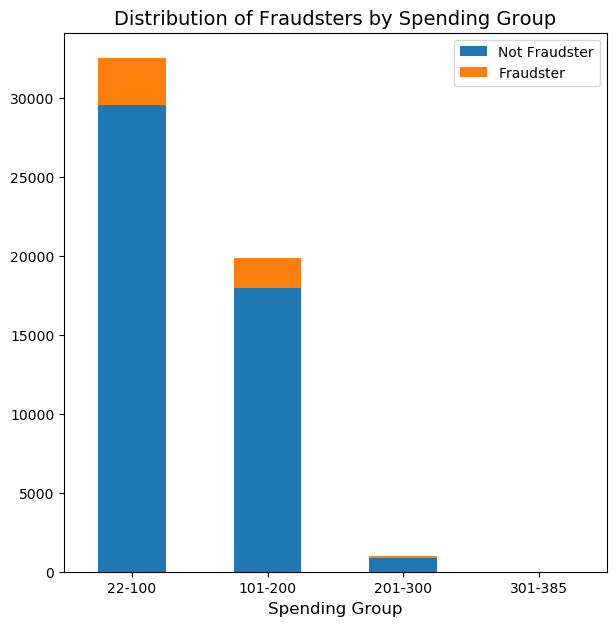

In [27]:
ax = spending_fraud_distribution.plot(kind='bar', stacked=True, figsize=(7, 7))
ax.set_xlabel('Spending Group', fontsize = 12)
ax.set_ylabel('', fontsize = 12)
ax.set_title('Distribution of Fraudsters by Spending Group', fontsize = 14)
plt.legend(title='', labels=['Not Fraudster', 'Fraudster'],fontsize = 10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### The majority of purchases falling within the price points of `$22 - $100` and `$101 - $200` exhibit the highest frequency of both spending and fraudulent activities.

## Let's work with features and discover on how we can best use them

<span style="font-size: 17.2px;">1. The IP address is in the format of IPv4 and IPv6, we will try to get it into numeric format with the help of `ipaddress` module.</span>

In [28]:
# Convert the IP address (Object datatype) into String
merged_train['IP_Address'] = merged_train['IP_Address'].astype("string")

In [29]:
print(merged_train['IP_Address'].dtypes) # Checking the data type

string


In [30]:
df_ip['lower_bound_ip_address'] = df_ip['lower_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
merged_train['ip_numeric'] = merged_train['IP_Address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df_ip['upper_bound_ip_address'] = df_ip['upper_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))

def find_country(ip_numeric):
    row = df_ip[(df_ip['lower_bound_ip_address'] <= ip_numeric) & (df_ip['upper_bound_ip_address'] >= ip_numeric)]
    if not row.empty:
        return row.iloc[0]['country']
    return None

# Apply the function to each row in the first dataset to find the country
merged_train['country'] = merged_train['ip_numeric'].apply(find_country)

In [31]:
merged_train.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,AgeGroup,SpendingGroup,ip_numeric,country
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0,30-39,22-100,815237196,United States
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0,30-39,22-100,1577685417,United Kingdom
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0,30-39,22-100,979279225,Japan
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0,30-39,22-100,3250268602,Austria
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0,18-29,22-100,2103448748,China


In [32]:
print(f"The missing values in the column country are {merged_train['country'].isnull().sum()}, that is {round(merged_train['country'].isnull().sum() * 100 / len(merged_train), 2)} %")

The missing values in the column country are 7811, that is 14.41 %


In [33]:
fraudsters_with_none_country = merged_train[(merged_train['country'].isnull()) & (merged_train['Fraudster'] == 1)]

num_fraudsters_with_none_country = len(fraudsters_with_none_country)
print(f"The number of fraudsters when country is None are {num_fraudsters_with_none_country}. \n")

print(f"So, out of 7811, whose IP corresponds to no country located after IP numeric conversion, 662 are actually marked as fraudsters. That is {round(662/7811*100, 1)} % are Fraudster Merchants.")

The number of fraudsters when country is None are 662. 

So, out of 7811, whose IP corresponds to no country located after IP numeric conversion, 662 are actually marked as fraudsters. That is 8.5 % are Fraudster Merchants.


### Beacuse the IP is specifically towards geolocation information, I don't want to impute the country missing values with most_frequent method, as it won't take the IP into consideration. So I do not want to drop the None columns too, and so I will replace this None with NotSpecified.

In [34]:
# merged_train['country'] = merged_train['country'].fillna('NotSpecified')
merged_train = merged_train.drop('country', axis = 1)

In [35]:
merged_train.head(10)

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,AgeGroup,SpendingGroup,ip_numeric
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0,30-39,22-100,815237196
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0,30-39,22-100,1577685417
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0,30-39,22-100,979279225
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0,30-39,22-100,3250268602
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0,18-29,22-100,2103448748
5,1746213,51878,2018-07-29 05:40:41,YSUUQMHOIJZHJ,M,30,10.119.144.96,119105,942386c5ab2c,2018-10-11 09:41:51,75,Ads,Credit Card,0,18-29,22-100,175607904
6,1746213,205612,2018-02-03 05:37:07,VOQNWQHJUKFSZ,F,28,135.121.143.189,150927,f5135bb9ab13,2018-03-27 20:06:24,65,SEO,Credit Card,0,18-29,22-100,2272890813
7,1746213,300823,2018-02-24 12:16:03,BQKBQIXSRMCHT,M,31,106.24.64.41,142294,d6f648eb802f,2018-04-12 02:19:59,152,SEO,Internet Banking,0,30-39,101-200,1779974185
8,1746213,172822,2018-01-22 12:29:32,MKGAJACYBWCXO,F,27,160.16.202.244,155784,0f98e4cfd92d,2018-02-02 16:39:03,80,SEO,Debit Card,1,18-29,22-100,2685455092
9,1746213,241476,2018-01-11 22:05:15,JJHGNMWRZRCML,M,41,93.33.235.39,138451,86ffa45527dc,2018-01-13 22:05:16,155,Ads,Credit Card,1,40-49,101-200,1562503975


<span style="font-size: 17.2px;">2. The Date_of_Order and Merchant_Registration_Date are the columns in Date and Timestamp format and so let's try to extract information from this feature.</span>

In [36]:
fraudsters = merged_train[merged_train['Fraudster'] == 1]

repeating_ips = fraudsters[fraudsters['ip_numeric'].duplicated(keep=False)]
grouped_repeating_ips = repeating_ips.groupby('ip_numeric')

for ip, group in grouped_repeating_ips:
    print(f"IP Address in Numeric: {ip}")
    print(group[['ip_numeric', 'Merchant_Registration_Date', 'Fraudster']])
    print("-------------------")

IP Address in Numeric: 2278095
       ip_numeric Merchant_Registration_Date  Fraudster
2813      2278095        2018-01-07 20:53:46          1
16973     2278095        2018-01-07 20:53:45          1
33016     2278095        2018-01-07 20:53:44          1
45994     2278095        2018-01-07 20:53:50          1
-------------------
IP Address in Numeric: 16669225
       ip_numeric Merchant_Registration_Date  Fraudster
1775     16669225        2018-01-12 08:40:29          1
3330     16669225        2018-01-12 08:40:21          1
17674    16669225        2018-01-12 08:40:30          1
23674    16669225        2018-01-12 08:40:25          1
37999    16669225        2018-01-12 08:40:24          1
52944    16669225        2018-01-12 08:40:23          1
-------------------
IP Address in Numeric: 18191460
      ip_numeric Merchant_Registration_Date  Fraudster
2812    18191460        2018-01-06 00:05:50          1
4569    18191460        2018-01-06 00:05:52          1
9839    18191460        2018

In [37]:
fraudsters = merged_train[merged_train['Fraudster'] == 1]
repeating_rdid = fraudsters[fraudsters['Registered_Device_ID'].duplicated(keep=False)]

grouped_repeating_rdid = repeating_rdid.groupby('Registered_Device_ID')

for ip, group in grouped_repeating_ips:
    print(f"Registered_Device_ID: {ip}")
    print(group[['Registered_Device_ID', 'Merchant_Registration_Date', 'Fraudster']])
    print("-------------------")

Registered_Device_ID: 2278095
      Registered_Device_ID Merchant_Registration_Date  Fraudster
2813         SOUVEITIXXJNV        2018-01-07 20:53:46          1
16973        SOUVEITIXXJNV        2018-01-07 20:53:45          1
33016        SOUVEITIXXJNV        2018-01-07 20:53:44          1
45994        SOUVEITIXXJNV        2018-01-07 20:53:50          1
-------------------
Registered_Device_ID: 16669225
      Registered_Device_ID Merchant_Registration_Date  Fraudster
1775         INULQYFYIDPJL        2018-01-12 08:40:29          1
3330         INULQYFYIDPJL        2018-01-12 08:40:21          1
17674        INULQYFYIDPJL        2018-01-12 08:40:30          1
23674        INULQYFYIDPJL        2018-01-12 08:40:25          1
37999        INULQYFYIDPJL        2018-01-12 08:40:24          1
52944        INULQYFYIDPJL        2018-01-12 08:40:23          1
-------------------
Registered_Device_ID: 18191460
     Registered_Device_ID Merchant_Registration_Date  Fraudster
2812        XYPZSMISOELB

### As we observe, there are occurrences of fraudsters with both IP Address and Registered_Device_ID engaging in fraudulent activities within a short span of time, repeatedly.

### Extracting time and date from merchant_registration_date into new columns

In [38]:
# extracting timestamp from original column to new column
merged_train['Merchant_Registration_Time'] = merged_train['Merchant_Registration_Date'].str.split().str[1].str.replace(':', '')

In [39]:
merged_train.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,AgeGroup,SpendingGroup,ip_numeric,Merchant_Registration_Time
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0,30-39,22-100,815237196,211511
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0,30-39,22-100,1577685417,101300
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0,30-39,22-100,979279225,074422
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0,30-39,22-100,3250268602,014139
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0,18-29,22-100,2103448748,005541


In [40]:
# extracting date from original column to new column
merged_train['Merchant_Registration_Date'] = pd.to_datetime(merged_train['Merchant_Registration_Date']).dt.strftime('%Y%m%d')

In [41]:
merged_train.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,AgeGroup,SpendingGroup,ip_numeric,Merchant_Registration_Time
0,1746213,50448,20180501,VATQMMZTVOZUT,F,39,48.151.136.76,129697,3b8983a83c7b,2018-07-30 10:59:13,90,SEO,Debit Card,0,30-39,22-100,815237196,211511
1,1746213,338754,20180414,LJCILLBRQZNKS,M,35,94.9.145.169,117390,34b5eb921228,2018-06-15 11:19:47,98,SEO,Internet Banking,0,30-39,22-100,1577685417,101300
2,1746213,291127,20180620,JFVHSUGKDAYZV,F,40,58.94.157.121,120162,41a1c86ff08b,2018-08-13 10:06:26,95,SEO,Credit Card,0,30-39,22-100,979279225,074422
3,1746213,319919,20180627,WFRXMPLQYXRMY,M,37,193.187.41.186,128228,e8c3ad80d916,2018-07-22 15:46:51,100,Direct,E-wallet,0,30-39,22-100,3250268602,014139
4,1746213,195911,20180105,GGHKWMSWHCMID,F,27,125.96.20.172,136029,e71ab1f26785,2018-04-16 08:02:44,78,SEO,E-wallet,0,18-29,22-100,2103448748,005541


### Let's add a column `Device_ID_Frequency` and label those registered ids which are frequent vs. which are not.

In [42]:
merged_train['Device_ID_Frequency'] = np.where(
    merged_train['Registered_Device_ID'].isin(
        merged_train['Registered_Device_ID'].unique()[merged_train['Registered_Device_ID'].value_counts() > 1]
    ),
    '2',
    np.where(
        merged_train['Registered_Device_ID'].isin(
            merged_train['Registered_Device_ID'].unique()[(merged_train['Registered_Device_ID'].value_counts() == 1)]
        ),
        '1',
        '0'
    )
)

In [43]:
merged_train['Device_ID_Frequency'].value_counts()

1    52531
2     1682
Name: Device_ID_Frequency, dtype: int64

## Let's drop the unwanted columns

In [44]:
merged_train = merged_train.drop(['Ecommerce_Provider_ID', 'Merchant_ID',
                                  'Registered_Device_ID', 'IP_Address', 'Customer_ID',
                                  'Order_ID', 'Date_of_Order',  'AgeGroup', 'SpendingGroup'], axis = 1)
merged_train.head()

,Merchant_Registration_Date,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,ip_numeric,Merchant_Registration_Time,Device_ID_Frequency
0,20180501,F,39,90,SEO,Debit Card,0,815237196,211511,2
1,20180414,M,35,98,SEO,Internet Banking,0,1577685417,101300,2
2,20180620,F,40,95,SEO,Credit Card,0,979279225,074422,2
3,20180627,M,37,100,Direct,E-wallet,0,3250268602,014139,2
4,20180105,F,27,78,SEO,E-wallet,0,2103448748,005541,2


## Let's convert the data types of each column to the desired datatype.

In [45]:
# Function to convert column datatypes
def convert_columns_types(DataFrame, cols=None, col_type = 'category'):
    print('Before conversion:\n', DataFrame.dtypes,'\n')
    DataFrame[cols] = DataFrame[cols].astype(col_type)
    print('After conversion:\n', DataFrame.dtypes,'\n')
    return DataFrame.head()

In [46]:
merged_train.dtypes

Merchant_Registration_Date    object
Gender                        object
Age                            int64
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Fraudster                      int64
ip_numeric                     int64
Merchant_Registration_Time    object
Device_ID_Frequency           object
dtype: object

In [47]:
# categorical columns

cat_cols = ['Gender', 'Order_Source', 'Order_Payment_Method', 'Device_ID_Frequency']

# numerical columns

num_cols = ['Merchant_Registration_Date', 'Age', 'Order_Value_USD', 'ip_numeric', 'Merchant_Registration_Time']

In [48]:
# converting object to categorical

convert_columns_types(merged_train, cols = cat_cols)

Before conversion:
 Merchant_Registration_Date    object
Gender                        object
Age                            int64
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
Fraudster                      int64
ip_numeric                     int64
Merchant_Registration_Time    object
Device_ID_Frequency           object
dtype: object 

After conversion:
 Merchant_Registration_Date      object
Gender                        category
Age                              int64
Order_Value_USD                  int64
Order_Source                  category
Order_Payment_Method          category
Fraudster                        int64
ip_numeric                       int64
Merchant_Registration_Time      object
Device_ID_Frequency           category
dtype: object 



,Merchant_Registration_Date,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,ip_numeric,Merchant_Registration_Time,Device_ID_Frequency
0,20180501,F,39,90,SEO,Debit Card,0,815237196,211511,2
1,20180414,M,35,98,SEO,Internet Banking,0,1577685417,101300,2
2,20180620,F,40,95,SEO,Credit Card,0,979279225,074422,2
3,20180627,M,37,100,Direct,E-wallet,0,3250268602,014139,2
4,20180105,F,27,78,SEO,E-wallet,0,2103448748,005541,2


In [49]:
# converting ['Merchant_Registration_Date'] to numerical

convert_columns_types(merged_train, cols = num_cols, col_type = 'int64')

Before conversion:
 Merchant_Registration_Date      object
Gender                        category
Age                              int64
Order_Value_USD                  int64
Order_Source                  category
Order_Payment_Method          category
Fraudster                        int64
ip_numeric                       int64
Merchant_Registration_Time      object
Device_ID_Frequency           category
dtype: object 

After conversion:
 Merchant_Registration_Date       int64
Gender                        category
Age                              int64
Order_Value_USD                  int64
Order_Source                  category
Order_Payment_Method          category
Fraudster                        int64
ip_numeric                       int64
Merchant_Registration_Time       int64
Device_ID_Frequency           category
dtype: object 



,Merchant_Registration_Date,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,Fraudster,ip_numeric,Merchant_Registration_Time,Device_ID_Frequency
0,20180501,F,39,90,SEO,Debit Card,0,815237196,211511,2
1,20180414,M,35,98,SEO,Internet Banking,0,1577685417,101300,2
2,20180620,F,40,95,SEO,Credit Card,0,979279225,74422,2
3,20180627,M,37,100,Direct,E-wallet,0,3250268602,14139,2
4,20180105,F,27,78,SEO,E-wallet,0,2103448748,5541,2


## Spliting the dataframe into Train and Test

In [50]:
X = merged_train.drop('Fraudster', axis = 1)
y = merged_train['Fraudster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [51]:
# function to separate numerical and categorical datatypes
def get_num_cat_dataframes(DataFrame):
    num_df = DataFrame.select_dtypes(include=['int','float'])
    cat_df = DataFrame.select_dtypes(include=['category'])
    return num_df, cat_df

x_train_num_df,x_train_cat_df = get_num_cat_dataframes(X_train)
x_test_num_df, x_test_cat_df = get_num_cat_dataframes(X_test)

### Scaling the numerical columns

In [52]:
scaler = StandardScaler()

scaler.fit(x_train_num_df)

x_train_num_std = scaler.transform(x_train_num_df)
x_test_num_std = scaler.transform(x_test_num_df)

In [53]:
# function to convert the returned numpy array from scaling to dataframe

def convert_numpy_array_to_dataframe(array, col_names):
    df = pd.DataFrame(array, columns=col_names)
    display(df.head())
    return df

x_train_num_std_df = convert_numpy_array_to_dataframe(x_train_num_std, col_names=num_cols)
x_test_num_std_df = convert_numpy_array_to_dataframe(x_test_num_std, col_names=num_cols)

,Merchant_Registration_Date,Age,Order_Value_USD,ip_numeric,Merchant_Registration_Time
0,0.401143,0.564465,0.651000,-1.670082,0.479689
1,-0.936938,0.913001,-0.313697,0.450293,-0.483732
2,-0.547034,-1.178213,2.098046,-0.246430,1.373555
3,-1.437610,-0.597320,1.221048,1.044157,-1.646923
4,1.650609,-0.829677,0.826400,0.082424,-0.508380


,Merchant_Registration_Date,Age,Order_Value_USD,ip_numeric,Merchant_Registration_Time
0,0.773324,1.029179,-0.971445,0.297903,0.509565
1,-1.437610,0.680644,-0.752196,1.582135,1.685766
2,-1.362288,-0.945856,3.895891,-1.298089,0.912644
3,-0.055222,-1.410570,0.431751,1.020128,-1.336776
4,-0.458419,-1.526749,-0.445247,-0.641453,1.067234


## Encoding the categorical columns

In [54]:
ohe=OneHotEncoder(handle_unknown='ignore',drop='first')

In [55]:
ohe.fit(x_train_cat_df)

OneHotEncoder(drop='first', handle_unknown='ignore')

In [56]:
x_train_cat_ohe = ohe.transform(x_train_cat_df).toarray()
x_test_cat_ohe = ohe.transform(x_test_cat_df).toarray()

In [57]:
x_train_cat_ohe_df = convert_numpy_array_to_dataframe(x_train_cat_ohe, col_names=ohe.get_feature_names_out(x_train_cat_df.columns))
x_test_cat_ohe_df=convert_numpy_array_to_dataframe(x_test_cat_ohe, col_names=ohe.get_feature_names_out(x_test_cat_df.columns))

,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Device_ID_Frequency_2
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Device_ID_Frequency_2
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [58]:
# Function to concat the scaled dataframe and encoded dataframe
def combine_num_cat_df(num_df,cat_df):
    final = pd.concat([num_df,cat_df],axis=1)
    return final

In [59]:
x_final_train_df = combine_num_cat_df(x_train_num_std_df, x_train_cat_ohe_df)
x_final_test_df = combine_num_cat_df(x_test_num_std_df, x_test_cat_ohe_df)

In [60]:
# Checking shape
print(x_final_train_df.shape)
print(y_train.shape)

print(x_final_test_df.shape)
print(y_test.shape)

(37949, 13)
(37949,)
(16264, 13)
(16264,)


## Model Building

In [61]:
# Function for models
def build_base_models(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train) # this will fit the model

    train_predicts = model.predict(x_train)
    test_predicts = model.predict(x_test)
    print('Train data: \n')
    calculate_metrics(y_train,train_predicts)
    print('Test data: \n')
    calculate_metrics(y_test, test_predicts)
    class_report(y_test, test_predicts)

def calculate_metrics(act, pred):
    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    print('Accuracy score:', accuracy_score(act, pred))
    print('Recall score:', recall_score(act, pred,average='weighted'))
    print('Precision score:', precision_score(act, pred, average='weighted'))
    print('f1 score:', f1_score(act,pred,average='weighted'))
    print('\n')

def class_report(act, pred):
  print('Classification Report: \n\n', classification_report(act, pred))

### 1. Decision Tree

In [62]:
dtclf = DecisionTreeClassifier()

build_base_models(dtclf, x_final_train_df, x_final_test_df, y_train, y_test)

Train data: 

Accuracy score: 1.0
Recall score: 1.0
Precision score: 1.0
f1 score: 1.0


Test data: 

Accuracy score: 0.8863748155435317
Recall score: 0.8863748155435317
Precision score: 0.899738988495493
f1 score: 0.8923064817743441


Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.92      0.94     14771
           1       0.41      0.52      0.45      1493

    accuracy                           0.89     16264
   macro avg       0.68      0.72      0.70     16264
weighted avg       0.90      0.89      0.89     16264



In [63]:
dtclf = DecisionTreeClassifier(class_weight='balanced')

build_base_models(dtclf, x_final_train_df, x_final_test_df, y_train, y_test)

Train data: 

Accuracy score: 1.0
Recall score: 1.0
Precision score: 1.0
f1 score: 1.0


Test data: 

Accuracy score: 0.8953516969995081
Recall score: 0.8953516969995081
Precision score: 0.9026270313730901
f1 score: 0.8987098129764782


Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.93      0.94     14771
           1       0.44      0.51      0.47      1493

    accuracy                           0.90     16264
   macro avg       0.69      0.72      0.71     16264
weighted avg       0.90      0.90      0.90     16264



In [64]:
importances = dtclf.feature_importances_
importances

array([0.39227186, 0.0864727 , 0.11781337, 0.154092  , 0.17873634,
       0.01236858, 0.00273646, 0.0124301 , 0.01014778, 0.01166162,
       0.00997119, 0.00819084, 0.00310714])

In [65]:
indices = np.argsort(importances)[::-1]
ind_attr_names = x_final_train_df.columns
pd.DataFrame([ind_attr_names[indices], np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Merchant_Registration_Date,Merchant_Registration_Time,ip_numeric,Order_Value_USD,Age,Order_Source_SEO,Gender_M,Order_Payment_Method_Debit Card,Order_Payment_Method_Credit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Device_ID_Frequency_2,Order_Source_Direct
1,0.392272,0.178736,0.154092,0.117813,0.086473,0.01243,0.012369,0.011662,0.010148,0.009971,0.008191,0.003107,0.002736


In [66]:
top_10 = importances.argsort()[-15:]
top_10_features = [ind_attr_names[i] for i in top_10]

In [67]:
X_train_top_10 = x_final_train_df[top_10_features]
X_test_top_10 = x_final_test_df[top_10_features]

In [68]:
build_base_models(dtclf, X_train_top_10, X_test_top_10, y_train, y_test)

Train data: 

Accuracy score: 1.0
Recall score: 1.0
Precision score: 1.0
f1 score: 1.0


Test data: 

Accuracy score: 0.896089522872602
Recall score: 0.896089522872602
Precision score: 0.9031965710129137
f1 score: 0.8993711085060372


Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.94      0.94     14771
           1       0.44      0.51      0.47      1493

    accuracy                           0.90     16264
   macro avg       0.70      0.72      0.71     16264
weighted avg       0.90      0.90      0.90     16264



### 2. Random Forest

In [69]:
rfclf = RandomForestClassifier(class_weight='balanced')
build_base_models(rfclf, x_final_train_df, x_final_test_df, y_train, y_test)

Train data: 

Accuracy score: 0.9998945953780073
Recall score: 0.9998945953780073
Precision score: 0.9998946076268813
f1 score: 0.9998945685807373


Test data: 

Accuracy score: 0.9445400885391048
Recall score: 0.9445400885391048
Precision score: 0.9405545062477972
f1 score: 0.9374496524175627


Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.99      0.97     14771
           1       0.85      0.48      0.61      1493

    accuracy                           0.94     16264
   macro avg       0.90      0.74      0.79     16264
weighted avg       0.94      0.94      0.94     16264



In [70]:
imbalance_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

### 3. AdaBoost Classifier

In [71]:
# class_weights = {0: 1, 1: len(y_train[y_train == 0]) / len(y_train[y_train == 1])}
class_weights = {0: 0.5, 1: 3.5}

In [72]:
# Function for models
def build_boosting_models(model, x_train, x_test, y_train, y_test, sample_weight=[class_weights[i] for i in y_train]):
    model.fit(x_train, y_train) # this will fit the model

    train_predicts = model.predict(x_train)
    test_predicts = model.predict(x_test)
    print('Train data: \n')
    calculate_metrics(y_train,train_predicts)
    print('Test data: \n')
    calculate_metrics(y_test, test_predicts)
    class_report(y_test, test_predicts)

def calculate_metrics(act, pred):
    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
    print('Accuracy score:', accuracy_score(act, pred))
    print('Recall score:', recall_score(act, pred,average='weighted'))
    print('Precision score:', precision_score(act, pred, average='weighted'))
    print('f1 score:', f1_score(act,pred,average='weighted'))
    print('\n')

def class_report(act, pred):
  print('Classification Report: \n\n', classification_report(act, pred))

In [73]:
ada = AdaBoostClassifier(random_state=42)
build_base_models(ada, x_final_train_df, x_final_test_df, y_train, y_test)
# model.fit(x_final_train_df, y_train, sample_weight=[class_weights[i] for i in y_train])

Train data: 

Accuracy score: 0.9134628053440144
Recall score: 0.9134628053440144
Precision score: 0.9026265726789359
f1 score: 0.9064957159124039


Test data: 

Accuracy score: 0.9126906050172159
Recall score: 0.9126906050172159
Precision score: 0.9029730995647508
f1 score: 0.906736887060075


Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.97      0.95     14771
           1       0.53      0.39      0.45      1493

    accuracy                           0.91     16264
   macro avg       0.74      0.68      0.70     16264
weighted avg       0.90      0.91      0.91     16264



### 4. Gradient Boost Classifier

In [74]:
gbc = GradientBoostingClassifier()
build_boosting_models(gbc, x_final_train_df, x_final_test_df, y_train, y_test)

Train data: 

Accuracy score: 0.9242404279427653
Recall score: 0.9242404279427653
Precision score: 0.9126448352849936
f1 score: 0.9127854894185768


Test data: 

Accuracy score: 0.9160723069355632
Recall score: 0.9160723069355632
Precision score: 0.9006600494940591
f1 score: 0.9038520830625496


Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.98      0.95     14771
           1       0.58      0.30      0.40      1493

    accuracy                           0.92     16264
   macro avg       0.76      0.64      0.68     16264
weighted avg       0.90      0.92      0.90     16264



### 5. Bagging Classifier

In [75]:
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
build_boosting_models(bg, x_final_train_df, x_final_test_df, y_train, y_test)

Train data: 

Accuracy score: 0.9604469155972489
Recall score: 0.9604469155972489
Precision score: 0.9598865353810685
f1 score: 0.9565592830108564


Test data: 

Accuracy score: 0.9361165764879489
Recall score: 0.9361165764879489
Precision score: 0.9290188576595464
f1 score: 0.9288297781162996


Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.98      0.97     14771
           1       0.75      0.45      0.57      1493

    accuracy                           0.94     16264
   macro avg       0.85      0.72      0.77     16264
weighted avg       0.93      0.94      0.93     16264



### 6. ANN

In [76]:
ann_model = Sequential()
ann_model.add(Dense(100, input_shape = (13,), activation = 'relu'))
ann_model.add(Dense(1, activation = 'sigmoid'))
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


2023-08-04 10:39:15.655230: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-04 10:39:15.655920: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-04 10:39:15.655938: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-33-212): /proc/driver/nvidia/version does not exist
2023-08-04 10:39:15.656476: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [77]:
ann_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [78]:
ann_model.fit(x_final_train_df, y_train, epochs = 10, batch_size = 64, validation_data=(x_final_test_df, y_test))

Epoch 1/10
593/593 [==============================] - 5s 7ms/step - loss: 0.2994 - accuracy: 0.9044 - val_loss: 0.2727 - val_accuracy: 0.9085
Epoch 2/10
593/593 [==============================] - 1s 1ms/step - loss: 0.2735 - accuracy: 0.9078 - val_loss: 0.2643 - val_accuracy: 0.9096
Epoch 3/10
593/593 [==============================] - 1s 1ms/step - loss: 0.2673 - accuracy: 0.9077 - val_loss: 0.2631 - val_accuracy: 0.9082
Epoch 4/10
593/593 [==============================] - 1s 1ms/step - loss: 0.2641 - accuracy: 0.9081 - val_loss: 0.2584 - val_accuracy: 0.9096
Epoch 5/10
593/593 [==============================] - 1s 1ms/step - loss: 0.2618 - accuracy: 0.9088 - val_loss: 0.2588 - val_accuracy: 0.9092
Epoch 6/10
593/593 [==============================] - 1s 1ms/step - loss: 0.2602 - accuracy: 0.9090 - val_loss: 0.2571 - val_accuracy: 0.9096
Epoch 7/10
593/593 [==============================] - 1s 1ms/step - loss: 0.2590 - accuracy: 0.9092 - val_loss: 0.2556 - val_accuracy: 0.9096
Epoch 

In [79]:
ann_preds = ann_model.predict(x_final_test_df)

509/509 [==============================] - 0s 674us/step


In [80]:
ann_preds

array([[0.04219155],
       [0.23990053],
       [0.14597122],
       ...,
       [0.28049526],
       [0.06971397],
       [0.09532791]], dtype=float32)

In [81]:
model_ann_2 = Sequential()

model_ann_2.add(Dense(100, input_shape=(13,), activation= "relu"))

model_ann_2.add(Dropout(0.2))

model_ann_2.add(Dense(50, activation= "relu"))
model_ann_2.add(Dense(25, activation= "relu"))

model_ann_2.add(Dense(1,activation= "sigmoid"))

model_ann_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               1400      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 7,751
Trainable params: 7,751
Non-trainable params: 0
_________________________________________________________________


In [82]:
model_ann_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [83]:
model_ann_2.fit(x_final_train_df, y_train, epochs=25, batch_size=64,validation_data=(x_final_test_df,y_test))

Epoch 1/25
593/593 [==============================] - 5s 8ms/step - loss: 0.2934 - accuracy: 0.9062 - val_loss: 0.2673 - val_accuracy: 0.9082
Epoch 2/25
593/593 [==============================] - 1s 2ms/step - loss: 0.2716 - accuracy: 0.9072 - val_loss: 0.2582 - val_accuracy: 0.9085
Epoch 3/25
593/593 [==============================] - 1s 2ms/step - loss: 0.2658 - accuracy: 0.9076 - val_loss: 0.2577 - val_accuracy: 0.9102
Epoch 4/25
593/593 [==============================] - 1s 2ms/step - loss: 0.2618 - accuracy: 0.9083 - val_loss: 0.2575 - val_accuracy: 0.9100
Epoch 5/25
593/593 [==============================] - 1s 2ms/step - loss: 0.2615 - accuracy: 0.9084 - val_loss: 0.2541 - val_accuracy: 0.9099
Epoch 6/25
593/593 [==============================] - 1s 2ms/step - loss: 0.2606 - accuracy: 0.9084 - val_loss: 0.2539 - val_accuracy: 0.9107
Epoch 7/25
593/593 [==============================] - 1s 2ms/step - loss: 0.2588 - accuracy: 0.9096 - val_loss: 0.2571 - val_accuracy: 0.9098
Epoch 

In [84]:
ann2 = model_ann_2.predict(x_final_test_df)
threshold = 0.5
predictions_binary = np.where(ann2 >= threshold, 1, 0)

print(predictions_binary)

509/509 [==============================] - 0s 702us/step
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


## Predicting on Test data given

In [85]:
# Read merchant data
test_merchant = pd.read_csv("test_merchant_data-1561627903902.csv")

# Read orders data
test_order = pd.read_csv("test_order_data-1561627931868.csv")

# Read labels data
test_labels = pd.read_csv("test-1561627952093.csv")

In [86]:
# Merging the dataset of train_merchant and train_order
merge_test_merchant_with_order = test_merchant.merge(test_order,on=["Merchant_ID"])
merge_test_merchant_with_order.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,1746213,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card
1,1746213,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card
2,1746213,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card
3,1746213,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card
4,1746213,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card


In [87]:
# Merging the dataframe merge_train_merchant_with_order (train_merchant and train_order) and train_labels

merged_test = merge_test_merchant_with_order.merge(test_labels,on=["Merchant_ID"])
merged_test.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method
0,1746213,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card
1,1746213,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card
2,1746213,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card
3,1746213,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card
4,1746213,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card


In [88]:
# Checking the Shape of Dataframe

print(f"The Shape of merged_test dataframe is {merged_test.shape[0]} rows and {merged_test.shape[1]} columns.")

The Shape of merged_test dataframe is 13554 rows and 13 columns.


In [89]:
df_ip2 = pd.read_csv("ip_boundaries_countries-1561628631121.csv")

In [90]:
df_ip2['lower_bound_ip_address'] = df_ip2['lower_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
merged_test['ip_numeric'] = merged_test['IP_Address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df_ip2['upper_bound_ip_address'] = df_ip2['upper_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
def find_country(ip_numeric):
    row = df_ip2[(df_ip2['lower_bound_ip_address'] <= ip_numeric) & (df_ip2['upper_bound_ip_address'] >= ip_numeric)]
    if not row.empty:
        return row.iloc[0]['country']
    return None

# Apply the function to each row in the first dataset to find the country
merged_test['country'] = merged_test['ip_numeric'].apply(find_country)

In [91]:
# merged_test_data['country'] = merged_test_data['country'].fillna('NotSpecified')
merged_test = merged_test.drop('country', axis = 1)

In [92]:
# Convert the IP address (Object datatype) into String
merged_test['IP_Address'] = merged_test['IP_Address'].astype("string")

In [93]:
# extracting timestamp from original column to new column
merged_test['Merchant_Registration_Time'] = merged_test['Merchant_Registration_Date'].str.split().str[1].str.replace(':', '')

In [94]:
merged_test['Merchant_Registration_Date'] = pd.to_datetime(merged_test['Merchant_Registration_Date']).dt.strftime('%Y%m%d')

In [95]:
merged_test['Device_ID_Frequency'] = np.where(
    merged_test['Registered_Device_ID'].isin(
        merged_test['Registered_Device_ID'].unique()[merged_test['Registered_Device_ID'].value_counts() > 1]
    ),
    '2',
    np.where(
        merged_test['Registered_Device_ID'].isin(
            merged_test['Registered_Device_ID'].unique()[(merged_test['Registered_Device_ID'].value_counts() == 1)]
        ),
        '1',
        '0'
    )
)

In [96]:
merged_test = merged_test.drop(['Ecommerce_Provider_ID', 'Merchant_ID',
                                  'Registered_Device_ID', 'IP_Address', 'Customer_ID',
                                  'Order_ID', 'Date_of_Order'], axis = 1)
merged_test.head()

,Merchant_Registration_Date,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,ip_numeric,Merchant_Registration_Time,Device_ID_Frequency
0,20180211,F,40,60,SEO,Credit Card,2258795582,205029,2
1,20180406,M,39,28,SEO,Credit Card,2555142743,131939,2
2,20180112,M,23,75,Ads,Debit Card,533332991,164749,2
3,20180219,M,34,98,SEO,Credit Card,217229497,215852,2
4,20180517,M,20,35,SEO,Credit Card,440259119,155019,2


In [97]:
merged_test.shape

(13554, 9)

In [98]:
convert_columns_types(merged_test, cols = cat_cols)
convert_columns_types(merged_test, cols = num_cols, col_type = 'int64')

Before conversion:
 Merchant_Registration_Date    object
Gender                        object
Age                            int64
Order_Value_USD                int64
Order_Source                  object
Order_Payment_Method          object
ip_numeric                     int64
Merchant_Registration_Time    object
Device_ID_Frequency           object
dtype: object 

After conversion:
 Merchant_Registration_Date      object
Gender                        category
Age                              int64
Order_Value_USD                  int64
Order_Source                  category
Order_Payment_Method          category
ip_numeric                       int64
Merchant_Registration_Time      object
Device_ID_Frequency           category
dtype: object 

Before conversion:
 Merchant_Registration_Date      object
Gender                        category
Age                              int64
Order_Value_USD                  int64
Order_Source                  category
Order_Payment_Method          

,Merchant_Registration_Date,Gender,Age,Order_Value_USD,Order_Source,Order_Payment_Method,ip_numeric,Merchant_Registration_Time,Device_ID_Frequency
0,20180211,F,40,60,SEO,Credit Card,2258795582,205029,2
1,20180406,M,39,28,SEO,Credit Card,2555142743,131939,2
2,20180112,M,23,75,Ads,Debit Card,533332991,164749,2
3,20180219,M,34,98,SEO,Credit Card,217229497,215852,2
4,20180517,M,20,35,SEO,Credit Card,440259119,155019,2


In [99]:
test_num_df, test_cat_df = get_num_cat_dataframes(merged_test)

In [100]:
scaler = StandardScaler()

scaler.fit(test_num_df)

test_num_std_df = scaler.transform(test_num_df)

In [101]:
test_num_std = convert_numpy_array_to_dataframe(test_num_std_df, col_names=num_cols)

,Merchant_Registration_Date,Age,Order_Value_USD,ip_numeric,Merchant_Registration_Time
0,-0.977115,0.795585,-0.707254,0.094843,1.269256
1,-0.112769,0.679282,-1.403766,0.330907,0.211300
2,-1.415936,-1.181562,-0.380764,-1.279627,0.686215
3,-0.941654,0.097768,0.119854,-1.531429,1.425915
4,0.379244,-1.530470,-1.251404,-1.353768,0.545376


In [102]:
test_ohe = ohe.fit(test_cat_df)

In [103]:
test_cat_ohe = test_ohe.transform(test_cat_df).toarray()

In [104]:
test_cat_ohe = convert_numpy_array_to_dataframe(test_cat_ohe, col_names=ohe.get_feature_names_out(test_cat_df.columns))

,Gender_M,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Device_ID_Frequency_2
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [105]:
test_cat_ohe.shape

(13554, 8)

In [106]:
test = combine_num_cat_df(test_num_std, test_cat_ohe)

In [107]:
test.shape

(13554, 13)

In [108]:
ann_preds_test = model_ann_2.predict(test)

424/424 [==============================] - 0s 706us/step


In [109]:
test_preds = bg.predict(test)

In [110]:
threshold = 0.5
predictions_binary = np.where(ann_preds_test >= threshold, 1, 0)

print(predictions_binary)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [111]:
ann_pred_df = pd.DataFrame(predictions_binary, columns=['Fraudster'])

In [112]:
df_both_for_ann = [test_labels, ann_pred_df]

In [113]:
result_ann = pd.concat(df_both_for_ann, axis = 1)

In [114]:
result_ann.head()

,Merchant_ID,Fraudster
0,53637,0
1,243517,0
2,343640,0
3,69889,0
4,125706,0


In [115]:
result_ann.to_csv('v3_ann_preds.csv', index=False)

In [116]:
test_preds

array([0, 0, 1, ..., 0, 0, 0])

In [117]:
test_preds_df = pd.DataFrame({'Fraudster' : test_preds})

In [118]:
test_preds_df.head()

,Fraudster
0,0
1,0
2,1
3,0
4,0


In [119]:
both_df = [test_labels, test_preds_df]

In [120]:
result = pd.concat(both_df, axis = 1)

In [121]:
result.head()

,Merchant_ID,Fraudster
0,53637,0
1,243517,0
2,343640,1
3,69889,0
4,125706,0


In [122]:
result.to_csv('v2_preds.csv', index=False)

In [123]:
# RF

RF_test_preds = rfclf.predict(test)

RF_test_preds_df = pd.DataFrame({'Fraudster' : RF_test_preds})

RF_df = [test_labels, RF_test_preds_df]

RF_result = pd.concat(RF_df, axis = 1)

RF_result.head()

RF_result.to_csv('RF_preds.csv', index=False)

In [124]:
# Ada

Ada_test_preds = ada.predict(test)

Ada_test_preds_df = pd.DataFrame({'Fraudster' : Ada_test_preds})

Ada_df = [test_labels, Ada_test_preds_df]

Ada_result = pd.concat(Ada_df, axis = 1)

Ada_result.head()

Ada_result.to_csv('Ada_preds.csv', index=False)

In [125]:
# GradientB

gbc_test_preds = gbc.predict(test)

gbc_test_preds_df = pd.DataFrame({'Fraudster' : gbc_test_preds})

gbc_df = [test_labels, gbc_test_preds_df]

gbc_result = pd.concat(gbc_df, axis = 1)

gbc_result.head()

gbc_result.to_csv('gbc_preds.csv', index=False)

In [126]:
# Bagging Classifier

bg_test_preds = bg.predict(test)

bg_test_preds_df = pd.DataFrame({'Fraudster' : bg_test_preds})

bg_df = [test_labels, bg_test_preds_df]

bg_result = pd.concat(bg_df, axis = 1)

bg_result.head()

bg_result.to_csv('bg_preds.csv', index=False)